## Techniques to handle missing values in dataset:-
##### Mean, median, mode Imputation 
##### Random Sample Imputation
##### Capturing nan values with new features
##### End of Distribution Imputation

## How to handle Categorical Missing Values:-
##### Frequent Category Imputation
##### Adding a Variable to Capture NAN 
##### Replacing NAN With New Categoryutation

# 1. Mean, median, mode Imputation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)

In [6]:
median = df.Age.median()
median

28.0

In [7]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [8]:
#check standard deviation of age_median is different5 from age
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


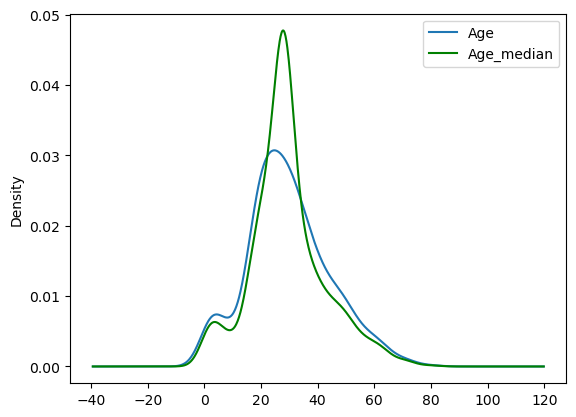

In [9]:
#check the distribution if age and age_median
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Observation
#### Loss of Data Variability:
Imputing with the mean or median reduces variability in the data. The imputed values do not reflect the natural variance that missing data might have had, leading to a dataset that may not accurately represent the true distribution of the data.
#### Bias Introduction:
Imputing with the mean or median can introduce bias, especially if the missing data are not missing completely at random (MCAR). For instance, if the missing values are related to a specific segment of the population, imputing with the overall mean or median might misrepresent that group.
#### Distortion of Relationships:
This method can distort relationships between variables. For example, if a dataset contains correlated variables, imputing missing values independently with the mean or median might weaken or obscure these correlations.

# 2. Random Sample Imputation

In [10]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [11]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state = 0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']

In [12]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


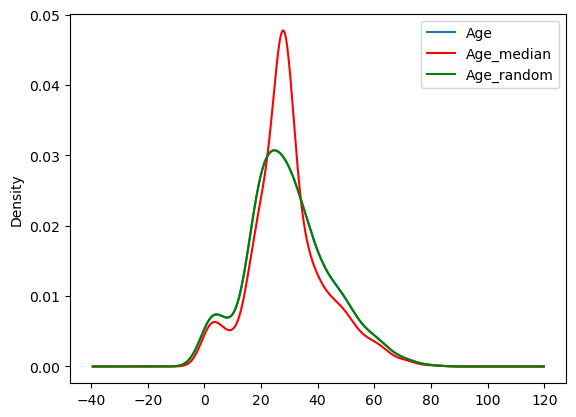

In [13]:
#check the distribution if age and age_median
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', color='red')
df.Age_random.plot(kind='kde', color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Observation
#### Advantages
<li>Filling missing values with random values from the same distribution preserves the variability of the original data, which can be crucial for models that rely on distribution characteristics.
<li>Unlike methods such as filling with the mean or median, random sampling doesn't introduce systematic bias into the data. It helps maintain the natural randomness that would have existed had the data not been missing.</li>

#### Disadvantages
<li>Randomly filling in missing values can introduce noise into the dataset, potentially leading to less accurate predictions. This noise can obscure underlying patterns that are important for model performance.
<li>While random sampling preserves variability, it may distort the original statistical properties (e.g., mean, variance) of the feature, especially if a large number of values are missing.

# 3. Capturing nan values with new features
This method involves creating an additional binary feature (a new column) that indicates whether a value was originally missing in the dataset.

In [14]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])

In [15]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
#Create a new feature, Age_NaN, where each entry is 1 if the corresponding Age value is missing, and 0 otherwise.
df['Age_nan'] = np.where (df['Age'].isnull(),1,0)

In [17]:
df.head()

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


## Observation
#### Advantages
<li>This technique retains information about the fact that a value was missing, which might be informative for the model. For example, in certain cases, the absence of a value can be meaningful in itself.
<li>By capturing the presence of NaN values, the model can learn patterns related to missingness, which might lead to improved predictive performance, especially if the missingness is not completely random.

#### Disadvantages
<li>The addition of new features increases the dimensionality of the dataset, which can lead to increased model complexity and potentially overfitting, especially if the dataset is small.

# 4. End of Distribution Imputation
The idea is to fill in missing values by using values from the extreme ends of the distribution of the feature—either very high or very low values that are unlikely to be present in the data naturally. This approach is particularly useful when you want to clearly distinguish imputed values from the actual data values.

In [18]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])

In [19]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
#selecting a value several standard deviations away from the mean (mean + 3*standard deviation)
extreme = df.Age.mean()+3*df.Age.std()

In [21]:
median = df.Age.median()

In [22]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace = True)

Creating a new feature called "end_distribution" and replacing all NaN values with extreme values. In the next line, replacing NaN values in the Age feature with the median.

In [23]:
impute_nan(df,'Age',median,extreme)
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


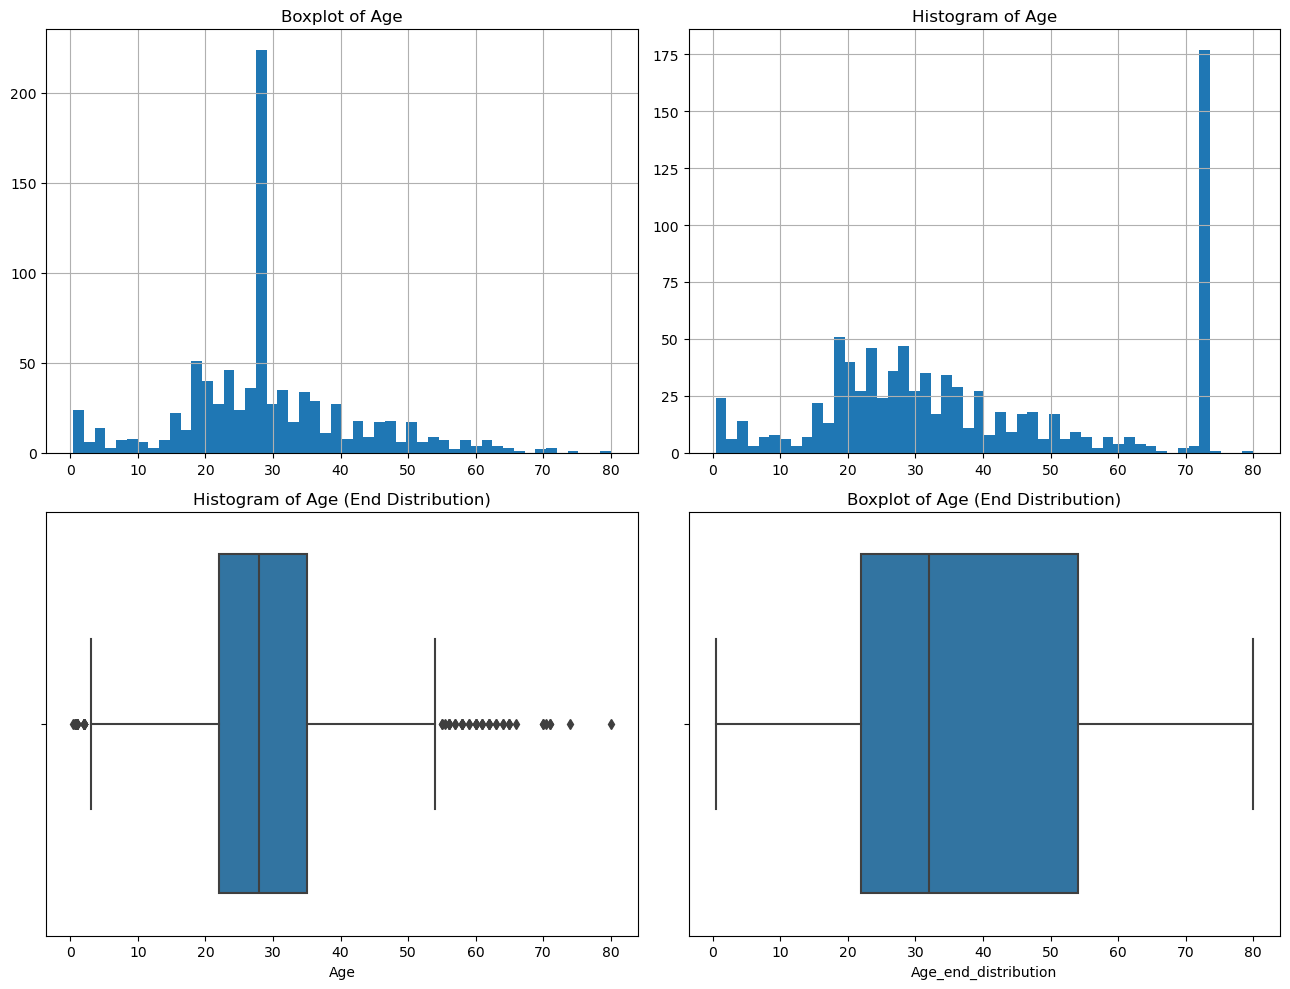

In [24]:
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

#Histogram for 'Age'
df['Age'].hist(bins=50, ax=axes[0, 0])
axes[0, 1].set_title('Histogram of Age')

#Histogram for 'Age_end_distribution'
df['Age_end_distribution'].hist(bins=50, ax=axes[0, 1])
axes[1, 0].set_title('Histogram of Age (End Distribution)')

#Boxplot for 'Age'
sns.boxplot(x='Age', data=df, ax=axes[1, 0])
axes[0, 0].set_title('Boxplot of Age')

#Boxplot for 'Age_end_distribution'
sns.boxplot(x='Age_end_distribution', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Age (End Distribution)')

# Adjust the layout
plt.tight_layout()
plt.show()

## Observation
#### Advantages
<li>The imputed values are easily distinguishable from the actual data values, which can be useful if you want the model to recognize that these values were originally missing.
<li>This method doesn't distort the central tendency or variability of the original data, as you're not replacing missing values with common values like the mean or median.

#### Disadvantages
<li>Since the imputed values are extreme, they might lead to misleading results, particularly in models sensitive to outliers (e.g., linear regression).
<li>This technique is not always appropriate, especially if the data has a natural range or if extreme values could skew the model's understanding of the feature.
<li>Imputing with extreme values might not be realistic or meaningful in the context of the data, potentially leading to less interpretable models.
    
#### When to Use
<li>Decision trees, for example, might benefit from this approach since they can treat the extreme imputed values as a separate category or a special condition.
<li>If you want to avoid distorting the central tendency of the feature’s distribution, this method is a good choice.

# How to handle Categorical Missing Values

# 1. Frequent Category Imputation

In [30]:
df = pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [31]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [32]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

#### Compute the frequency with every feature

<Axes: xlabel='BsmtQual'>

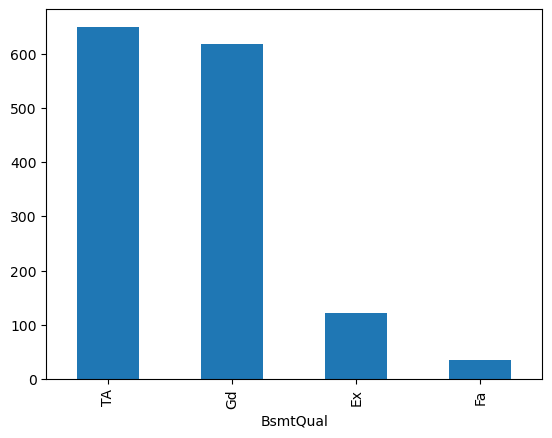

In [35]:
df['BsmtQual'].value_counts().plot.bar()

<Axes: xlabel='FireplaceQu'>

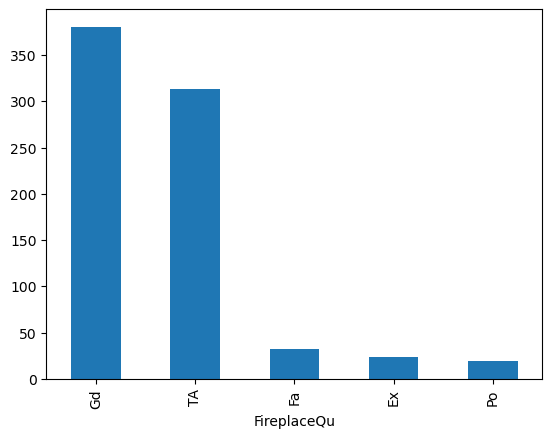

In [36]:
df['FireplaceQu'].value_counts().plot.bar()

<Axes: xlabel='GarageType'>

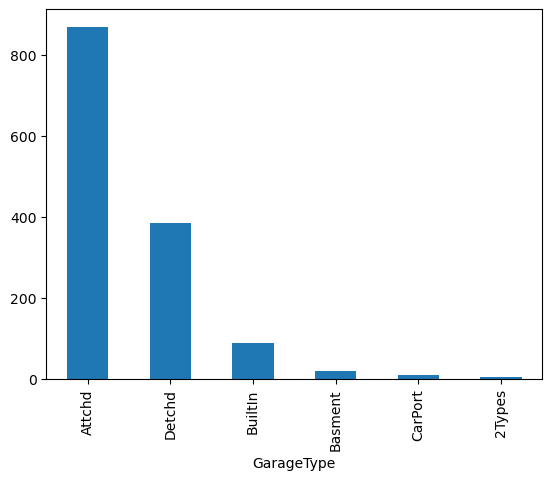

In [37]:
df['GarageType'].value_counts().plot.bar()

In [42]:
def impute_nan(df,variable):
    most_freq_category = df[variable].mode()[0]
    df[variable].fillna(most_freq_category,inplace = True)

This function will pick the most frequent value for each feature and then fills the missing values with this most frequent category

In [43]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [44]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

## Observation
#### Advantages
<li>Easy to use
<li>Faster way to impute if feature have less missing values
#### Disadvantages
<li>Imputing missing values with the mode reduces the variability in the data. This can make the dataset less representative of the true distribution, especially if the mode is significantly more frequent than other categories.
<li>Filling missing values with the most frequent category can introduce bias, particularly if the missing data is not randomly distributed. This can lead to overrepresentation of the mode, skewing the analysis and model predictions.

# 2. Adding a Variable to Capture NAN

In [50]:
df = pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [51]:
df['BsmtQual_var'] = np.where (df['BsmtQual'].isnull(),1,0)
frequent = df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(frequent,inplace = True)

In [52]:
df['FireplaceQu_var'] = np.where (df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace = True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


## Observation
### Advantages
<li>This method allows the model to capture the fact that data was missing, which could be informative. 
<li>By preserving the information about missingness, this technique can lead to better model performance, especially if the missingness is not random n:

### Disadvantages
<li>The addition of new binary features increases the dimensionality of the dataset, which can lead to increased model complexity and potential overfitting, particularly if the dataset is small.
<li>The introduction of a new feature to capture NaN values can complicate the interpretation of the model, especially when it interacts with the imputed categorical feature.
<li>If a large portion of the data is missing, this method might not be effective, as the new feature could dominate the model and reduce its ability to learn from the original data.

# 3. Replacing NAN With New Category

In [63]:
df = pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [64]:
def impute_nan(df,variable):
    df[variable+"_newvar"] = np.where(df[variable].isnull(),"Missing",df[variable])

The impute_nan function is designed to handle missing values (NaNs) in a specified column of a DataFrame by creating a new feature that captures the presence or absence of missing data. The new column (variable + "_newvar") will contain the string "Missing" wherever the original column had a missing value, and it will contain the original values from the variable column wherever there were no missing values."

In [65]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [66]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [67]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis = 1)

In [68]:
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
